In [67]:
# set present working directory
%cd "E:\BigDataAnalytics\Classifier\Data"

E:\BigDataAnalytics\Classifier\Data


In [68]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import spacy_sentence_bert

In [79]:
# set filenames

# input JSON file name
fileName            = 'bhbkh2jowm4ztp4bckxxuwsuje.json'

fileNameNoExt       = fileName.split('.')[0]
parquetRawFileName  = fileNameNoExt +'_raw.parkquet'
parquetVecFileName  = fileNameNoExt +'_vectorized.parkquet'


In [80]:
data = []
with open(fileName, 'r', encoding="utf8") as f:
  data = f.readlines()
  
data = [json.loads(item)['Item'] for item in data]

#print(data[:2])

# process JSON data

for i in range(len(data)):
  for key in data[i].keys():
    data[i][key] = data[i][key]["S"]
    
#print(data[:2])

df = pd.DataFrame(data)
df = df[['topic','title']]


# clean up bad rows

print(df.isnull().sum())

## OUTPUT
## topic    0
## title    1
## dtype: int64

df = df.dropna()

print(df.head())

topic    0
title    0
dtype: int64
           topic                                              title
0  ENTERTAINMENT  Exclusive! Paras Chhabra and Mahira Sharma rev...
1  ENTERTAINMENT  Mandalorian spin-off The Book of Boba Fett wil...
2  ENTERTAINMENT  Eager fans gush over new 'Twilight' book, 'Mid...
3       BUSINESS      Golf carts allowed on city streets in Gautier
4       BUSINESS  Dealers' threats to people living among 'party...


In [81]:
print(df.topic.unique())

## OUTPUT
## array(['ENTERTAINMENT', 'BUSINESS', 'NATION', 'SPORTS', 'WORLD',
##     'TECHNOLOGY', 'HEALTH', 'SCIENCE'], dtype=object)

['ENTERTAINMENT' 'BUSINESS' 'NATION' 'SPORTS' 'WORLD' 'TECHNOLOGY'
 'HEALTH' 'SCIENCE']


In [82]:
# save raw dataframe into parquet file
df.to_parquet(parquetRawFileName)

In [61]:
# keep topics the same, no need to change them
#print(df.topic.unique())
#data = df[(df['topic'] != 'NATION') & (df['topic'] != 'WORLD')]

#print(data.topic.unique())

In [77]:
# clean up bad row

print(df.isnull().sum())

## OUTPUT
## topic    0
## title    1
## dtype: int64

df = df.dropna()

topic    0
title    0
dtype: int64


<AxesSubplot: >

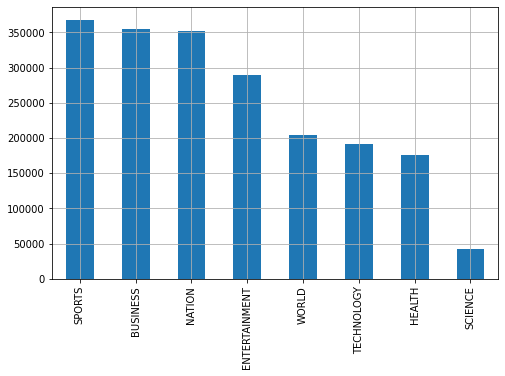

In [83]:
counts = df['topic'].value_counts()
counts.plot(kind='bar', legend=False, grid=True, figsize=(8, 5))

<AxesSubplot: >

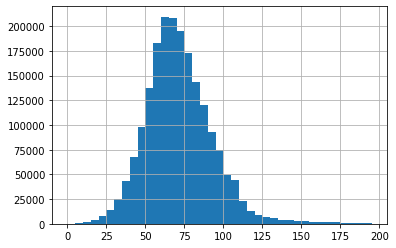

In [84]:
lens = df.title.str.len()
lens.hist(bins = np.arange(0,200,5))

In [85]:
# no sure what this does?

#for topic in df.topic.unique():
#  temp_df = df[df['topic'] == topic][:5000]
#  df = pd.concat([df, temp_df])

In [88]:
len(df.index) 

197983.0

In [86]:
# load one of the models listed at https://github.com/MartinoMensio/spacy-sentence-bert/
nlp = spacy_sentence_bert.load_model('en_stsb_distilbert_base')

### Vectorize Title Text - this step makes it possible to run classification algorithms

In [ ]:
# this operationg took over 25 min to run
#df['vector'] = df['title'].apply(lambda x: nlp(x).vector)

stub_df = data[:30000]

stub_df['vector'] = stub_df['title'].apply(lambda x: nlp(x).vector)

# execution times:  
# 100     rows - 3.6 sec
# 1000    rows - 26.9 sec
# 10,000  rows - 5m 19 sec
# 30,000  rows - approx 15 min
display(stub_df)

# export stub to pickle file
stub_df.to_pickle(path='./stub_df2.pkl')

In [ ]:
stub_df = pd.read_pickle('./stub_df2.pkl')

In [ ]:
#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(stub_df['vector'].tolist(), stub_df['topic'].tolist(), test_size=0.33, random_state=42)

In [ ]:
stub_df.topic.unique()

In [ ]:
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

## OUTPUT
## 0.8392929292929293

# Test Classifier

In [ ]:
headlines = ["Scientists Figured Out How Much Exercise You Need to 'Offset' a Day of Sitting",
 "Marlee Matlin On Her Career And 'CODA' — The Actor's Side – Deadline",
 "Increasing mental health issues a symptom of Victoria's lockdown",
 'Philippines polio outbreak over: UN',
 "Sophie, Countess of Wessex opens up about menopause: ‘It's like somebody's just gone and taken your brain'",
 'Bill Gates tells why he prefers Android mobile over iPhone',
 "'A weight has been lifted' Edinburgh pubs and restaurants react to hospitality rules easing",
 "Mysterious Signal Flashing From Galaxy's Core Baffle Scientists; Where Is There Source of This Radio Waves?",
 "'Tears in their eyes': World erupts over All Blacks' beautiful Maradona tribute",
 "'Packed in like sardines'"]

topics = ['SCIENCE',  'ENTERTAINMENT',  'HEALTH',
 'HEALTH',  'ENTERTAINMENT',  'TECHNOLOGY',  'BUSINESS',
 'SCIENCE',  'SPORTS',  'ENTERTAINMENT']

In [ ]:
for headline, topic in zip(headlines, topics):
  print(headline)
  print(f"True Label: {topic}, Predicted Label: {clf.predict(nlp(headline).vector.reshape(1, -1))[0]} \n")

In [ ]:
stub_df.to_pickle(path='./stub_df.pkl')

In [ ]:
stub2 = pd.read_pickle('./stub_df.pkl')